In [ ]:
import keras
from keras import layers

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
encoder = keras.Model(input_img, encoded)
decoder = keras.Model(encoded, decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 5s 17ms/step - loss: 0.0855 - val_loss: 0.0835
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0842 - val_loss: 0.0834
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0842 - val_loss: 0.0835
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0842 - val_loss: 0.0835
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0841 - val_loss: 0.0832
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0840 - val_loss: 0.0831
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0839 - val_loss: 0.0828
Epoch 8/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0838 - val_loss: 0.0829
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0837 - val_loss: 0.0832
Epoch 10/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0836 - val_lo

In [ ]:
encoded_imgs = encoder.predict(x_test)

noise_cst = 10

encoded_imgs = encoded_imgs + noise_cst*np.random.normal(loc=0.0, scale=1.0, size=encoded_imgs.shape)  #add noise

decoded_imgs = decoder.predict(encoded_imgs)

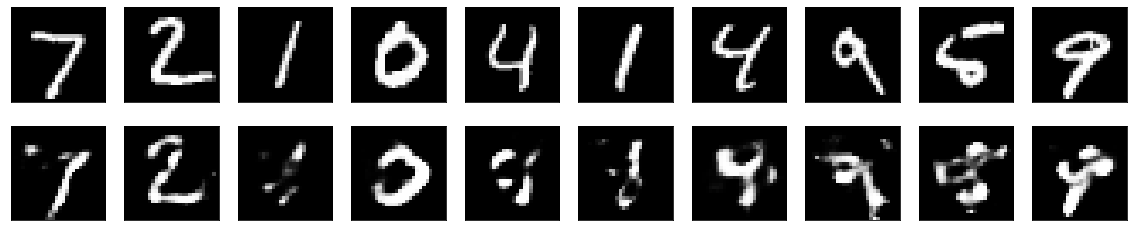

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("aa.png")
plt.show()